In [1]:
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, GRU, RNN
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data into a dataframe
data = np.load('polution_dataSet.npy')

In [3]:
'''
IN this part data for test, validation and train is preperd.
'''
# data format is : pollution  ,dew  ,temp  , press ,wnd_dir , wnd_spd , snow , rain
# total data =43000
# per day and week = 43000/24*7 =250

SAMPLE_DISTANCE = 24      # if 1 sample per hour, if 24 per day, if 24*7 per week
TRAIN_SIZE = 1000
VAL_SIZE = 500
TEST_SIZE = 200
TIMESTEPS = 7             # timesteps used for a single prediction (here each timestep is a day)
HOUR = 2                  # which hour of day ? (0-23) (not so important)

In [4]:
x_train = []
y_train = []
for i in range(TRAIN_SIZE):
    x_train.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_train.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_train = np.array(x_train)
y_train = np.array(y_train)

In [5]:
x_val = []
y_val = []
for i in range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE):
    x_val.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_val.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_val = np.array(x_val)
y_val = np.array(y_val)

In [6]:
x_test = []
y_test = []
for i in range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE):
    x_test.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_test.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_test = np.array(x_test)
y_test = np.array(y_test)
y_total = np.concatenate([y_train, y_val, y_test], axis=None)

In [7]:
'''
In this part network is implemented 
'''
# parameters
BATCH_SIZE = 10
NUM_EPOCHS = 20
HIDDEN_SIZE = 40

In [8]:
K.clear_session()
# keras modeling
model = Sequential()
model.add(GRU(HIDDEN_SIZE,  input_shape=(TIMESTEPS, 8), return_sequences=False,activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 40)                5880      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 5,921
Trainable params: 5,921
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, validation_data=(x_val, y_val))

Train on 1000 samples, validate on 500 samples
Epoch 1/20
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0473 - val_loss: 0.0253
Epoch 2/20
1000/1000 [==============================] - 1s 877us/step - loss: 0.0222 - val_loss: 0.0305
Epoch 3/20
1000/1000 [==============================] - 1s 877us/step - loss: 0.0200 - val_loss: 0.0183
Epoch 4/20
1000/1000 [==============================] - 1s 890us/step - loss: 0.0183 - val_loss: 0.0158
Epoch 5/20
1000/1000 [==============================] - 1s 882us/step - loss: 0.0161 - val_loss: 0.0201
Epoch 6/20
1000/1000 [==============================] - 1s 893us/step - loss: 0.0171 - val_loss: 0.0154
Epoch 7/20
1000/1000 [==============================] - 1s 892us/step - loss: 0.0160 - val_loss: 0.0139
Epoch 8/20
1000/1000 [==============================] - 1s 914us/step - loss: 0.0154 - val_loss: 0.0177
Epoch 9/20
1000/1000 [==============================] - 1s 930us/step - loss: 0.0158 - val_loss: 0.0134
Epoch 10/20
1000/

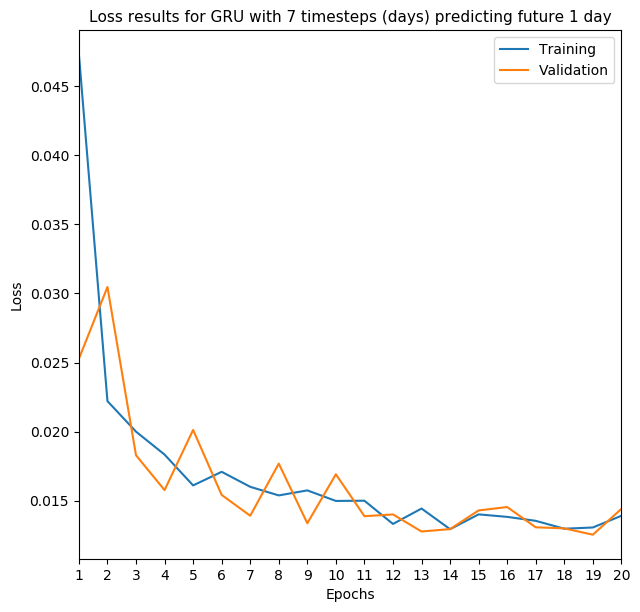

In [11]:
plt.figure(1, figsize=(7, 7), dpi=100)
plt.style.use(['default'])
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['loss'], label='Training')
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['val_loss'], label='Validation')
plt.xticks(np.arange(1, NUM_EPOCHS+1, 1, dtype=int))
plt.xlim(1, NUM_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss results for GRU with 7 timesteps (days) predicting future 1 day', fontsize=11)
plt.legend()
plt.show()

In [12]:
print('train loss history:', history.history["loss"])
print('test loss history:', history.history["val_loss"])
scores = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1)
print('\nTest result loss: %.3f' % (scores))

train loss history: [0.04729611191898584, 0.022210020367056132, 0.020003736591897903, 0.01834573660977185, 0.01611628788523376, 0.017099280674010515, 0.016015352313406766, 0.01539241663645953, 0.015756628760136664, 0.014993587145581841, 0.015008243094198405, 0.013329201289452612, 0.014443288664333523, 0.012949883453547955, 0.014022532938979567, 0.013840744611807168, 0.013554188297130168, 0.012983914013020695, 0.013073874996043741, 0.013921356140635908]
test loss history: [0.025278047043830156, 0.03046552397310734, 0.018296179668977855, 0.015777573445811866, 0.020128540806472302, 0.015428857477381826, 0.01392253052443266, 0.01769419513642788, 0.013378933779895305, 0.016921542696654798, 0.013889503162354232, 0.01401754659600556, 0.012784127360209823, 0.012956769755110144, 0.014308519223704933, 0.01455125636421144, 0.013087415131740271, 0.013009486440569162, 0.012552095744758844, 0.014421208528801799]
200/200 [==============================] - 0s 160us/step

Test result loss: 0.012


In [13]:
y_train = model.predict(x_train, batch_size=BATCH_SIZE)
y_val = model.predict(x_val, batch_size=BATCH_SIZE)
y_pred = model.predict(x_test, batch_size=BATCH_SIZE)

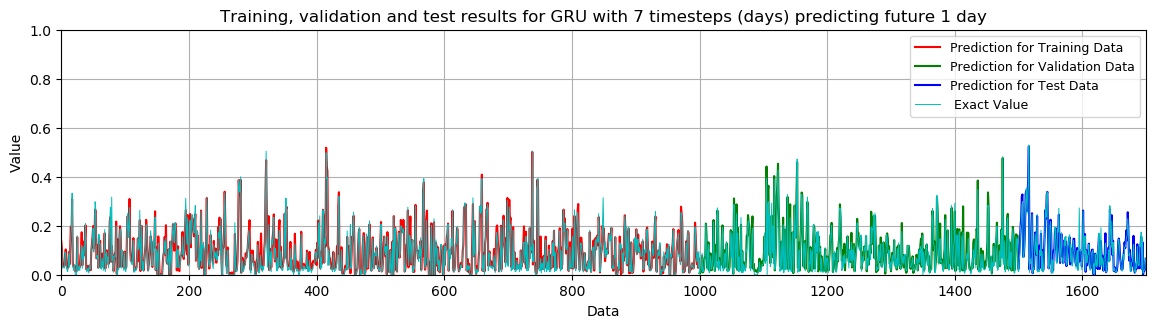

In [14]:
plt.figure(2, figsize=(14, 7), dpi=100)
plt.style.use(['default'])
plt.subplot(211)
plt.plot(range(0, TRAIN_SIZE), y_train, c='r', linewidth=1.5, label='Prediction for Training Data')
plt.plot(range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE), y_val, c='g', linewidth=1.5, label='Prediction for Validation Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, c='b', linewidth=1.5, label='Prediction for Test Data')
plt.plot(range(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total, c='c', linewidth=0.7, label=' Exact Value')
plt.xlim(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Training, validation and test results for GRU with 7 timesteps (days) predicting future 1 day')
plt.legend(loc='best', fontsize=9)
plt.grid(True)
plt.show()

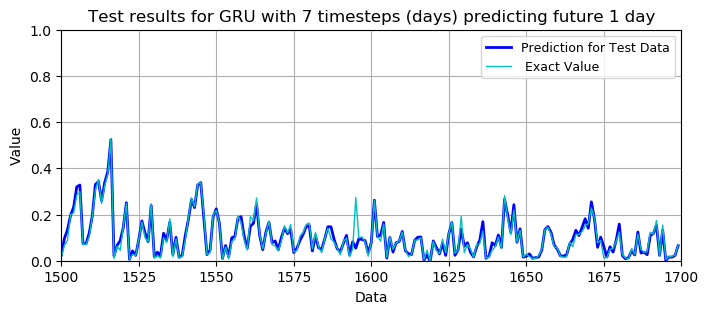

In [15]:
plt.figure(3, figsize=(8, 3), dpi=100)
plt.style.use(['default'])
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, 'b', linewidth=2, label='Prediction for Test Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total[TRAIN_SIZE+VAL_SIZE:TRAIN_SIZE+VAL_SIZE+TEST_SIZE], c='c', linewidth=1, label=' Exact Value')
plt.xlim(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Test results for GRU with 7 timesteps (days) predicting future 1 day')
plt.grid(True)
plt.legend(loc='best', fontsize=9)
plt.show()